In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<div>
<h1 style="font-size: 40px; color:#f71519; align: center; text-shadow: 2px 3px  #d9cfd8;">Reddit Title Posts</h1>
<p>
    <font size=4px><b><i>Predictive Analytics Project</i></b></font>
    <br><font face="Product Sans"><font color='#565b81'>Timothy Jonah E. Borromeo
    <br> Jeffrey Delos Reyes Cantre
    <br> Prince John Dadubo
    </font></font>
</p>
    </div>
    </div>


<h2 style="font-size: 30px; color:#f71519; align: center; text-shadow: 2px 3px  #d9cfd8;">ETL</h2>
<p>
    <font size=3px><b>Importing our respective <code>libraries</code></b></font>
    <br><font size=3px><font face="Futura PT">
    <ul>
        <li>pandas</li>  
        <li>matplotlib</li>
        <li>seaborn</li>
        <li>os</li>
        <li>Python Reddit API Wrapper</li>
        <li>regex</li>
        <li>nltk</li>
        <li>sklearn</li>
    </ul>    
    </font></font>
</p>


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import praw
import re
import contractions
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from autocorrect import Speller

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

from tqdm import tqdm,tqdm_notebook

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 7.5]
sns.set(style='darkgrid', context='talk', palette='Dark2')

<h3 style="font-size: 20px; color:#0062ac; align: center; text-shadow: 2px 3px  #d9cfd8;"><font face ="Product Sans">Using OS to find folder path and files</font></h3>
<p>
    <font face="Gotham Medium"> Using OS find the respective CSV file or dataset
        </font>
</p>

In [3]:
## For getting our csv file
dir = os.getcwd()
csv = "reddit post.csv"
csv = os.path.join(dir, csv)
# print(os.listdir(dir))

<p>
    <font face="Gotham Medium"> This is when we use the Python Reddit API Wrapper to collate our data from Reddit
        </font>
</p>

In [4]:
## For when using Python Reddit API Wrapper 
## to collect data from Reddit
path = "../Proj/reddit user files/"
passw = "pass.txt"
secret = "reddit_secret_key.txt"
id = "reddit_user_ID.txt"
# print(os.listdir(path))

In [5]:
passw = os.path.join(path, passw)
secret = os.path.join(path, secret)
id = os.path.join(path, id)

***


<h2 style="font-size: 30px; color:#f71519; align: center; text-shadow: 2px 3px  #d9cfd8;"><font face="Product Sans">Loading our data</font></h2>
<p>
    <font size=3px><b>Loading in our textual data</b></font>
<!--     <br><font face="Product Sans"><font color='#565b81'>
    </font></font> -->
</p>
    

In [6]:
df = pd.read_csv(csv)
display(df.head())
display(df.tail())

,title,score,subreddit,num_comments,flair
0,Man stabbed on LA metro for rapping out loud a...,14609,PublicFreakout,3722,Caution: Blood 🔴
1,"""You are the first person in the history of ti...",27700,PublicFreakout,1803,NaN
2,Music band in Poland playing on a bike riding ...,1757,PublicFreakout,70,NaN
3,Racism at it's finest in Georgia,14724,PublicFreakout,1571,NaN
4,Women protesting in Tehran taking off their sc...,8351,PublicFreakout,358,NaN


,title,score,subreddit,num_comments,flair
855,half time!,359,PublicFreakout,46,NaN
856,She’s the Support Act,6126,PublicFreakout,223,Concert Freakout
857,(TITLE FIX) Okay so... The guy walking next to...,406,PublicFreakout,61,NaN
858,manager karen tells customer she has monkeypox...,402,PublicFreakout,103,Loose Fit 🤔
859,Woman lectures Christian band playing in publi...,747,PublicFreakout,271,NaN


<h3 style="font-size: 20px; color:#0062ac; align: center; text-shadow: 2px 3px  #d9cfd8;"><font face ="Product Sans">Getting our values from the dataframe.</font></h3> 

In [7]:
# Getting our values
text_df = text_df = df[['title', 'score']].copy()
text_df

,title,score
0,Man stabbed on LA metro for rapping out loud a...,14609
1,"""You are the first person in the history of ti...",27700
2,Music band in Poland playing on a bike riding ...,1757
3,Racism at it's finest in Georgia,14724
4,Women protesting in Tehran taking off their sc...,8351
...,...,...
855,half time!,359
856,She’s the Support Act,6126
857,(TITLE FIX) Okay so... The guy walking next to...,406
858,manager karen tells customer she has monkeypox...,402


In [8]:
print(sorted(text_df['score'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 99, 100, 101, 104, 106, 107, 108, 109, 111, 112, 113, 114, 115, 117, 118, 119, 121, 124, 125, 126, 127, 129, 130, 131, 132, 136, 137, 138, 139, 140, 143, 144, 146, 149, 150, 152, 154, 155, 156, 157, 162, 165, 168, 169, 170, 172, 173, 175, 177, 178, 180, 181, 182, 184, 187, 188, 189, 190, 191, 196, 197, 206, 207, 208, 212, 216, 217, 218, 219, 222, 225, 228, 229, 230, 231, 235, 237, 238, 239, 241, 242, 244, 247, 248, 250, 253, 254, 258, 259, 268, 271, 273, 274, 279, 281, 283, 284, 285, 288, 289, 290, 292, 295, 299, 303, 306, 307, 308, 309, 312, 315, 320, 322, 325, 337, 340, 342, 348, 349, 350, 353, 355, 358, 359, 363, 364, 367, 374, 376, 3

In [9]:
text_df.describe()

,score
count,860.000000
mean,1959.101163
std,7284.000888
min,0.000000
25%,30.000000
50%,141.500000
75%,691.750000
max,96882.000000


<h3 style="font-size: 20px; color:#0062ac; align: center; text-shadow: 2px 3px  #d9cfd8;"><font face ="Product Sans">Labeling our data.</font></h3> 
<p>
    <font face="Gotham Medium"> In labeling our data, we use the score column. Since we don't know how to measure these scores, we use pandas.cut to segment and sort these values. Having 3 labels.
                <ul>
            <li>low</li>
            <li>medium</li>
            <li>high</li>
        </ul>
    </font>

</p>

In [10]:
text_df['label'] = pd.cut(text_df['score'], 3, labels=['low','medium', 'high'])

In [11]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   title   860 non-null    object  
 1   score   860 non-null    int64   
 2   label   860 non-null    category
dtypes: category(1), int64(1), object(1)
memory usage: 14.5+ KB


In [12]:
# sorted(text_df["label"].unique())

<p>
    <font face="Gotham Medium"> This doesn't show much, that is why we will need to divide it more equally since any posts with a 1000+ score is still engaging whilst having a score of 0 is not.
              </font>

</p>

In [13]:
text_df["label"].value_counts() # This doesnt show much, that is why we will need to divide it more equally since any posts
                                # with a 1000+ score still is engaging whilst havin a score of 0 is not 

low       848
medium      9
high        3
Name: label, dtype: int64

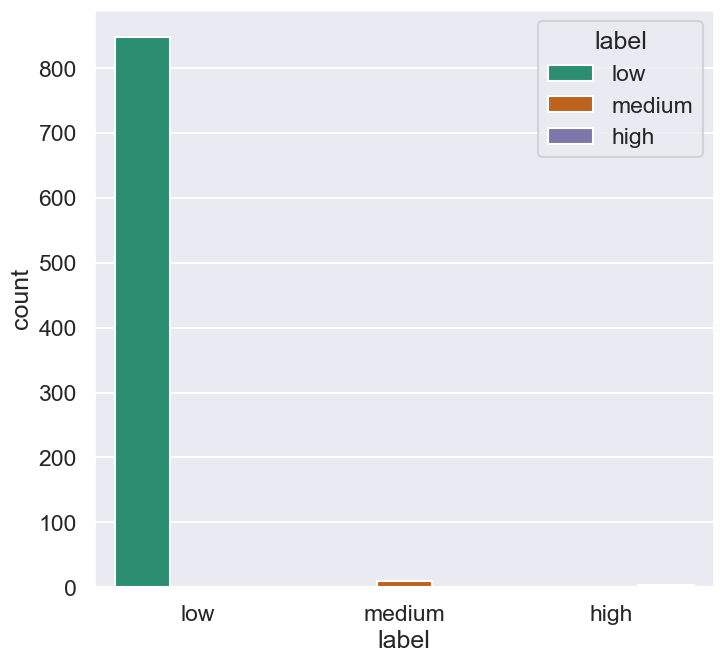

In [14]:
sns.countplot(x= text_df["label"], hue=text_df["label"])
plt.show()

In [15]:
text_df

,title,score,label
0,Man stabbed on LA metro for rapping out loud a...,14609,low
1,"""You are the first person in the history of ti...",27700,low
2,Music band in Poland playing on a bike riding ...,1757,low
3,Racism at it's finest in Georgia,14724,low
4,Women protesting in Tehran taking off their sc...,8351,low
...,...,...,...
855,half time!,359,low
856,She’s the Support Act,6126,low
857,(TITLE FIX) Okay so... The guy walking next to...,406,low
858,manager karen tells customer she has monkeypox...,402,low


<p>
    <font face="Gotham Medium"> Sorting our values by Score
              </font>

</p>

In [16]:
# Sorting our values by Score
text_df.sort_values("score", ascending=False)

,title,score,label
643,[Follow-Up] The protestor arrested today for c...,96882,high
591,Kid barely makes it home to escape bully,72006,high
522,Federal way Washington cop’s TikTok video that...,67045,high
323,Man killed by police after calling 911 because...,58699,medium
712,“So you’re saying the fact that I tried to kil...,54323,medium
...,...,...,...
327,"""it's not good to be Arabic tonight"" said Isra...",0,low
333,Check the original comments post,0,low
493,Woman and her vagina,0,low
695,It’s a rough world out there,0,low


<p>
    <font face="Gotham Medium">Determining the maximum values and mimimum values for each label
              </font>

</p>

In [17]:
# Determining the maximum values and mimimum values for each label
display(text_df[text_df['label'] == 'low'].max())
display(text_df[text_df['label'] == 'low'].min())

title     😂😂😂😂
score    32092
label      low
dtype: object

title    "Activist" dressed as a Jew harasses Holocaust...
score                                                    0
label                                                  low
dtype: object

In [18]:
display(text_df[text_df['label'] == 'medium'].max())
display(text_df[text_df['label'] == 'medium'].min())

title    “So you’re saying the fact that I tried to kil...
score                                                58699
label                                               medium
dtype: object

title    An immigration attorney just exposed Ron DeSan...
score                                                34468
label                                               medium
dtype: object

In [19]:
display(text_df[text_df['label'] == 'high'].max())
display(text_df[text_df['label'] == 'high'].min())

title    [Follow-Up] The protestor arrested today for c...
score                                                96882
label                                                 high
dtype: object

title    Federal way Washington cop’s TikTok video that...
score                                                67045
label                                                 high
dtype: object

**`low`** = 0 - 32,092           <br>
**`medium`** = 34,468 - 58,699   <br>
**`high`** = 67,045 - 96,882

<p>
    <font face="Gotham Medium"> We can then use numpy.where to return indices of elements in an input array where the given condition is satisfied.
                <ul>
            <li>"score" 0 to 999 is 0 - <u>little to no engagement</u> </li>
            <li>"score" 1,000 to 4,999 is 1 - <u>engaging</u></li>
                <li>"score" 5,000 to 19,999 is 2 - <u>moderate engagement</u></li>
            <li>"score" 20,000 to 49,999 is 3 - <u>very engaging</u></li>
            <li>"score" 50,000 and above is 4 - <u>high engagement</u></li>
                    </ul>
              </font>

</p>

In [20]:
text_df['label'] = np.where(
    text_df['score'] < 1000, 0,
    np.where(
        text_df['score'] < 5000, 1,
        np.where(text_df['score'] < 20000, 2,
                 np.where(text_df['score'] < 50000, 3, 4))))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
text_df["label"].value_counts()

0    684
1    108
2     44
3     19
4      5
Name: label, dtype: int64

****
<!-- <h3 style="font-size: 20px; color:#0062ac; align: center; text-shadow: 2px 3px  #d9cfd8;"><font face ="Product Sans">One Hot Encoding</font></h3>  -->

In [22]:
# # Encode labels
# le = LabelEncoder()
# labels = le.fit_transform(text_df['label'])

# # One-hot encode labels
# ohe = OneHotEncoder()
# one_hot = ohe.fit_transform(labels.reshape(-1, 1))

In [23]:
# one_hot_df = pd.DataFrame(one_hot.toarray(), columns=le.classes_)
# text_df = pd.concat([text_df, one_hot_df], axis=1)

<h3 style="font-size: 20px; color:#0062ac; align: center; text-shadow: 2px 3px  #d9cfd8;"><font face ="Product Sans">Checking for null values.</font></h3> 

In [24]:
text_df.isnull().sum()

title    0
score    0
label    0
dtype: int64

<h3 style="font-size: 20px; color:#0062ac; align: center; text-shadow: 2px 3px  #d9cfd8;"><font face ="Product Sans">Total number of textual data.</font></h3> 

In [25]:
len(text_df) ## Total Number of texts

860

In [26]:
text_df

,title,score,label
0,Man stabbed on LA metro for rapping out loud a...,14609,2
1,"""You are the first person in the history of ti...",27700,3
2,Music band in Poland playing on a bike riding ...,1757,1
3,Racism at it's finest in Georgia,14724,2
4,Women protesting in Tehran taking off their sc...,8351,2
...,...,...,...
855,half time!,359,0
856,She’s the Support Act,6126,2
857,(TITLE FIX) Okay so... The guy walking next to...,406,0
858,manager karen tells customer she has monkeypox...,402,0


<h3 style="font-size: 20px; color:#0062ac; align: center; text-shadow: 2px 3px  #d9cfd8;"><font face ="Product Sans">Getting our text values</font></h3> 

In [27]:
txt = list(text_df['title'].values)

In [28]:
display(txt)

['Man stabbed on LA metro for rapping out loud and annoying other passengers',
 '"You are the first person in the history of time that has ever been upset with me." "Well, there is a first time for everything!"',
 'Music band in Poland playing on a bike riding through town',
 "Racism at it's finest in Georgia",
 'Women protesting in Tehran taking off their scarves shouting: women, life, freedom… death to the Islamic republic…',
 "Portland mom finds stranger asleep in 10 year-old son's bed",
 "Kid walks into Hulk Hogan's beach store and owns him",
 'Off-duty cop gets physical because he struggles to use words',
 'Good Freakout - Uploading social media videos without consent.',
 "[UPDATE] Guy who pulled out a hatchet at a NYC McDonald's explains why he did it.",
 'When the landlord dies and the new “landlord” comes in unannounced to change the locks. Public freak out ensues.',
 'Los Angeles police attempting a drive-by shooting on two men',
 'The cops set this guy on fire trying to subdu

<div>
<h2 style="font-size: 24px; color:#009bc2; align: center; text-shadow: 2px 3px  #d9cfd8;">Text Normalization</h2>
<p>    
    <font face="Product Sans"><font size=3px><b>Data Preprocessing/Cleaning our data for data training</b></font></font>
    </p>    
</div>

<h3 style="font-size: 20px; color:#FF5A5F; align: center; text-shadow: 2px 3px  #d9cfd8;"><font face ="Product Sans">Word Tokeninzation, Removing Punctuations, Removing repeating characters</font></h3> 

In [29]:
## Word Tokenization
def tokenizeText(text):
    word_tokens = nltk.word_tokenize(text)
    return word_tokens

## Remove Punctuations
def rem_punct(my_str):
    punctuations = '''!()-[]{};:'.'"“”\,<>./?@#$%^—-&_0123456789~*…''' 

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct=no_punct +char
    return no_punct

## Remove Repeated charcters or words
def removeRepeatedChar(tokens):
    repeatPattern = re.compile(r'(\w*)(\w)\2(\w*)')
    matchSub = r'\1\2\3'
    def replace(oldWord):
        if wordnet.synsets(oldWord):
            return oldWord
        newWord = repeatPattern.sub(matchSub, oldWord)
        return replace(newWord) if newWord!=oldWord else newWord
    correctTokens = [replace(word) for word in tokens]
    return correctTokens        

<h3 style="font-size: 20px; color:#FF5A5F; align: center; text-shadow: 2px 3px  #d9cfd8;"><font face ="Product Sans">Remove Stopwords</font></h3> 

In [30]:
## Remove Stopwords
myWordDictionary = []
def remove_stopwords_orig(text):
    words = text
    stopWords = set(stopwords.words('english'))
#     words = data
    
    wordsFiltered = []
    for w in words:
        if w not in stopWords:
            myWordDictionary.append(w)
            wordsFiltered.append(w)
            wordsFiltered.append(' ')
           
    return "".join(wordsFiltered) 

<h3 style="font-size: 20px; color:#FF5A5F; align: center; text-shadow: 2px 3px  #d9cfd8;"><font face ="Product Sans">Checking and Removing emojis</font></h3> 

In [31]:
def detect_emojis(textdata):
    # Compile a regular expression pattern to search for emojis
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F923"
        "]+",
        flags=re.UNICODE)
    emojis = emoji_pattern.findall(textdata)
    return emojis


def remove_emojis(textdata):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "]+",
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', textdata)

<h3 style="font-size: 20px; color:#FF5A5F; align: center; text-shadow: 2px 3px  #d9cfd8;"><font face ="Product Sans">Checking their Spelling</font></h3> 

In [32]:
# Spelling
checkSpelling = Speller(lang='en')

<h3 style="font-size: 20px; color:#FF5A5F; align: center; text-shadow: 2px 3px  #d9cfd8;"><font face ="Product Sans">Removing Strings with 2 letters only</font></h3> 

In [33]:
# def rem2(sentences):
#     global filtered_sentences
#     filtered_sentences = []
#     for sentence in sentences:
#         words = sentence.split()  # Split the sentence into a list of words
#         filtered_words = []  # Create an empty list to store the filtered words
#         for word in words:
#             if len(word) != 2:  # Append only the words with a length other than 2 to the filtered_words list
#                 filtered_words.append(word)
#         filtered_sentence = " ".join(filtered_words)  # Join the filtered words to form a new sentence
#         filtered_sentences.append(filtered_sentence)
#     return filtered_sentences

In [34]:
def rem2(sentences):
    global filtered_sentences
    words = sentences.split()  # Split the text into a list of words
    filtered_words = [word for word in words if len(word) != 2]
    return " ".join(filtered_words)

<h3 style="font-size: 20px; color:#FF5A5F; align: center; text-shadow: 2px 3px  #d9cfd8;"><font face ="Product Sans">Preprocessing function for our text data</font></h3> 

In [35]:
def preprocess_text(textdata):
    textdata = checkSpelling(textdata.lower())
    expandedText = contractions.fix(textdata)
    remPunct = rem_punct(expandedText)
    remEmojis = remove_emojis(remPunct)
    rem2words = rem2(remEmojis) 
    tokenList = tokenizeText(rem2words)
    repWords = removeRepeatedChar(tokenList)
    newWordList = remove_stopwords_orig(repWords)

    return newWordList

*****

<h3 style="font-size: 23px; color:#FF5A5F; align: center; text-shadow: 2px 3px  #d9cfd8;"><font face ="Product Sans">Normalizing our textual data</font></h3>
<p>    
    <font face="Product Sans"><font size=3px><b>Detect emojis and Data preporcessing</b>
        </font></font>
    
</p> 

In [36]:
emoji = []
for x in tqdm(txt, desc = "Textual Data"):
    detect = detect_emojis(x)
    emoji.append(detect)

emotes = list(filter(lambda x: x != [], emoji))  # Filter the emoji list
print(emotes)

Textual Data: 100%|███████████████████████████████████████████████████████████████| 860/860 [00:00<00:00, 71867.49it/s]

[['😂😂😂😂'], ['😱😱😱'], ['😂'], ['😂😂'], ['😂'], ['😂😂'], ['😆😆😆'], ['💀'], ['😂😂😂'], ['😅'], ['👀👀👀'], ['😂😂😂'], ['😂'], ['😂😂'], ['😂'], ['😂'], ['😈'], ['🍄'], ['🙁🙁'], ['😰'], ['🙃'], ['😂😂😂😂'], ['💀'], ['😉🤣'], ['😂😂'], ['🎂🎉🎊'], ['🇩🇴💥'], ['💥'], ['🇯🇲💥'], ['😤'], ['😭']]


In [37]:
# new_text.clear()

In [38]:
new_text = []
for w in tqdm_notebook(txt, desc = "Textual Data"):
    new_text.append(preprocess_text(w))

Textual Data:   0%|          | 0/860 [00:00<?, ?it/s]

In [39]:
new_text

['man stabbed metro rapping loud annoying passengers ',
 'first person history time ever upset well first time everything ',
 'music band poland playing bike riding town ',
 'racism finest georgia ',
 'women protesting tehran taking scares shouting women life freedom death islamic republic ',
 'portland mom finds stranger asleep yearold sons bed ',
 'kid walks hulk hogans beach store owns ',
 'ofduty cop gets physical struggles use words ',
 'good breakout uploading social media videos without consent ',
 'update guy pulled hatchet nyc mcdonalds explains ',
 'landlord dies new landlord comes unannounced change locks public freak ensues ',
 'los angeles police attempting driveby shooting two men ',
 'cops set guy fire trying subdue laser gas pump ',
 'recently fired million taxpayer funded charge investigation voter fraud election former supreme court justice michael nobleman defending man racing purposely openly admits committed felony election fraud three times ',
 'bulst ',
 'protest

******

<div>
<h2 style="font-size: 24px; color:#009bc2; align: center; text-shadow: 2px 3px  #d9cfd8;">Text Classification</h2>
<p>    
    <font size=3px><b>Using TF IDF vectorizer</b></font>
    </p>    
</div>

In [40]:
def tfidf_extractor(corpus, ngram_range = (1,1)): ## TFIDF Vectorizer
    tfidf_vect = TfidfVectorizer(min_df=1, ngram_range=ngram_range, norm='l2', smooth_idf=True, use_idf=True)
    tfidf_features = tfidf_vect.fit_transform(corpus)
    return tfidf_vect, tfidf_features 

In [41]:
tfidf_vectorizer, tfidf_features = tfidf_extractor(new_text)

names= tfidf_vectorizer.get_feature_names() ## names or columns using tfidf vectorizer
feat = np.round(tfidf_features.todense(), 2)

<IPython.core.display.Javascript object>

In [42]:
# word_counts.clear()

In [43]:
word_counts = {}
for word in names:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1
        
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)  

In [44]:
sorted_words

[('abiding', 1),
 ('abruptly', 1),
 ('absolute', 1),
 ('abusing', 1),
 ('accident', 1),
 ('accidentally', 1),
 ('accused', 1),
 ('accuses', 1),
 ('across', 1),
 ('act', 1),
 ('acting', 1),
 ('active', 1),
 ('activist', 1),
 ('activists', 1),
 ('activities', 1),
 ('actor', 1),
 ('actual', 1),
 ('adi', 1),
 ('admits', 1),
 ('advance', 1),
 ('advocate', 1),
 ('adî', 1),
 ('affecting', 1),
 ('afghan', 1),
 ('afghanistan', 1),
 ('african', 1),
 ('afternoon', 1),
 ('age', 1),
 ('aged', 1),
 ('agent', 1),
 ('aggression', 1),
 ('aggressive', 1),
 ('ago', 1),
 ('air', 1),
 ('airline', 1),
 ('airport', 1),
 ('aisle', 1),
 ('ajaxgbr', 1),
 ('alberta', 1),
 ('alex', 1),
 ('alexandria', 1),
 ('alive', 1),
 ('allegedly', 1),
 ('allen', 1),
 ('allow', 1),
 ('allowed', 1),
 ('almost', 1),
 ('alone', 1),
 ('along', 1),
 ('alright', 1),
 ('also', 1),
 ('always', 1),
 ('amazing', 1),
 ('amazon', 1),
 ('american', 1),
 ('among', 1),
 ('anchor', 1),
 ('andersonews', 1),
 ('andrea', 1),
 ('andrew', 1),
 ('a

In [45]:
## Converting it to a DataFrame
data = pd.DataFrame(data = feat, columns=names)
pd.set_option('display.max_columns', None)
data.head(15) 

abiding  abruptly  absolute  abusing  accident  accidentally  accused  \
0       0.0       0.0       0.0      0.0       0.0           0.0      0.0   
1       0.0       0.0       0.0      0.0       0.0           0.0      0.0   
2       0.0       0.0       0.0      0.0       0.0           0.0      0.0   
3       0.0       0.0       0.0      0.0       0.0           0.0      0.0   
4       0.0       0.0       0.0      0.0       0.0           0.0      0.0   
5       0.0       0.0       0.0      0.0       0.0           0.0      0.0   
6       0.0       0.0       0.0      0.0       0.0           0.0      0.0   
7       0.0       0.0       0.0      0.0       0.0           0.0      0.0   
8       0.0       0.0       0.0      0.0       0.0           0.0      0.0   
9       0.0       0.0       0.0      0.0       0.0           0.0      0.0   
10      0.0       0.0       0.0      0.0       0.0           0.0      0.0   
11      0.0       0.0       0.0      0.0       0.0           0.0      0.0   
12      0.0       0.0       0.0      0.0       0.0           0.0      0.0   
13      0.0       0.0       0.0      0.0       0.0           0.0      0.0   
14      0.0       0.0       0.0      0.0       0.0           0.0      0.0   

    accuses  across  act  acting  active  activist  activists  activities  \
0       0.0     0.0  0.0     0.0     0.0       0.0        0.0         0.0   
1       0.0     0.0  0.0     0.0     0.0       0.0        0.0         0.0   
2       0.0     0.0  0.0     0.0     0.0       0.0        0.0         0.0   
3       0.0     0.0  0.0     0.0     0.0       0.0        0.0         0.0   
4       0.0     0.0  0.0     0.0     0.0       0.0        0.0         0.0   
5       0.0     0.0  0.0     0.0     0.0       0.0        0.0         0.0   
6       0.0     0.0  0.0     0.0     0.0       0.0        0.0         0.0   
7       0.0     0.0  0.0     0.0     0.0       0.0        0.0         0.0   
8       0.0     0.0  0.0     0.0     0.0       0.0        0.0         0.0   
9       0.0     0.0  0.0     0.0     0.0       0.0        0.0         0.0   
10      0.0     0.0  0.0     0.0     0.0       0.0        0.0         0.0   
11      0.0     0.0  0.0     0.0     0.0       0.0        0.0         0.0   
12      0.0     0.0  0.0     0.0     0.0       0.0        0.0         0.0   
13      0.0     0.0  0.0     0.0     0.0       0.0        0.0         0.0   
14      0.0     0.0  0.0     0.0     0.0       0.0        0.0         0.0   

    actor  actual  adi  admits  advance  advocate  adî  affecting  afghan  \
0     0.0     0.0  0.0    0.00      0.0       0.0  0.0        0.0     0.0   
1     0.0     0.0  0.0    0.00      0.0       0.0  0.0        0.0     0.0   
2     0.0     0.0  0.0    0.00      0.0       0.0  0.0        0.0     0.0   
3     0.0     0.0  0.0    0.00      0.0       0.0  0.0        0.0     0.0   
4     0.0     0.0  0.0    0.00      0.0       0.0  0.0        0.0     0.0   
5     0.0     0.0  0.0    0.00      0.0       0.0  0.0        0.0     0.0   
6     0.0     0.0  0.0    0.00      0.0       0.0  0.0        0.0     0.0   
7     0.0     0.0  0.0    0.00      0.0       0.0  0.0        0.0     0.0   
8     0.0     0.0  0.0    0.00      0.0       0.0  0.0        0.0     0.0   
9     0.0     0.0  0.0    0.00      0.0       0.0  0.0        0.0     0.0   
10    0.0     0.0  0.0    0.00      0.0       0.0  0.0        0.0     0.0   
11    0.0     0.0  0.0    0.00      0.0       0.0  0.0        0.0     0.0   
12    0.0     0.0  0.0    0.00      0.0       0.0  0.0        0.0     0.0   
13    0.0     0.0  0.0    0.17      0.0       0.0  0.0        0.0     0.0   
14    0.0     0.0  0.0    0.00      0.0       0.0  0.0        0.0     0.0   

    afghanistan  african  afternoon  age  aged  agent  aggression  aggressive  \
0           0.0      0.0        0.0  0.0   0.0    0.0         0.0         0.0   
1           0.0      0.0        0.0  0.0   0.0    0.0         0.0         0.0   
2           0.0      0.0        0.0  0.0   0.0    0.0         

In [46]:
data.shape

(860, 2600)

<div>
<h2 style="font-size: 30px; color:#f71519; align: center; text-shadow: 2px 3px  #d9cfd8;">Training our data</h2>
<p>    
    <font size=3px><b>Using Random Forest</b></font>
    </p>    
</div>

In [47]:
def train_test(x, y):
    global sent_train, sent_test, y_train, y_test 
    sent_train, sent_test, y_train, y_test = train_test_split(x,
                                                              y,
                                                              test_size=0.25,
                                                              random_state=123)
    return sent_train, sent_test, y_train, y_test    

In [48]:
y = text_df['label'].values

In [49]:
train_test(txt,y)
tfidf_vect = TfidfVectorizer(min_df=1,
                                 ngram_range=(1, 1),
                                 norm='l2',
                                 smooth_idf=True,
                                 use_idf=True)
vector = tfidf_vect.fit(sent_train)

X_train = vector.transform(sent_train)
X_test = vector.transform(sent_test)

<h3 style="font-size: 20px; color:#0062ac; align: center; text-shadow: 2px 3px  #d9cfd8;"><font face ="Product Sans">Our model</font></h3> 

In [50]:
from sklearn.multiclass import OneVsRestClassifier
rfc = OneVsRestClassifier(RandomForestClassifier(random_state=42,n_estimators=100))

<!-- <h3 style="font-size: 20px; color:#0062ac; align: center; text-shadow: 2px 3px  #d9cfd8;"><font face ="Product Sans">Tuning the SVM hyperparameters</font></h3>  -->

<h3 style="font-size: 20px; color:#0062ac; align: center; text-shadow: 2px 3px  #d9cfd8;"><font face ="Product Sans">Fitting our model</font></h3> 

In [51]:
rfc.fit(X_train, y_train) #Using Random Forest Classifier for fitting
rfc_score = rfc.score(X_test, y_test)
print('Accuracy using Random Forest Classifier: %.5f ' % rfc_score)

Accuracy using Random Forest Classifier: 0.78140 


****

<h3 style="font-size: 23px; color:#FF5A5F; align: center; text-shadow: 2px 3px  #d9cfd8;"><font face ="Product Sans">Confusion Matrix</font></h3>

In [52]:
y_pred = rfc.predict(X_test)

In [53]:
confusion_matrix(y_test, y_pred)
confusion_matrix_df = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'],margins=True, 
                                  dropna=True)
confusion_matrix_df

Predicted,0,1,All
Actual,,,
0,167,0,167
1,29,1,30
2,13,0,13
3,4,0,4
4,1,0,1
All,214,1,215


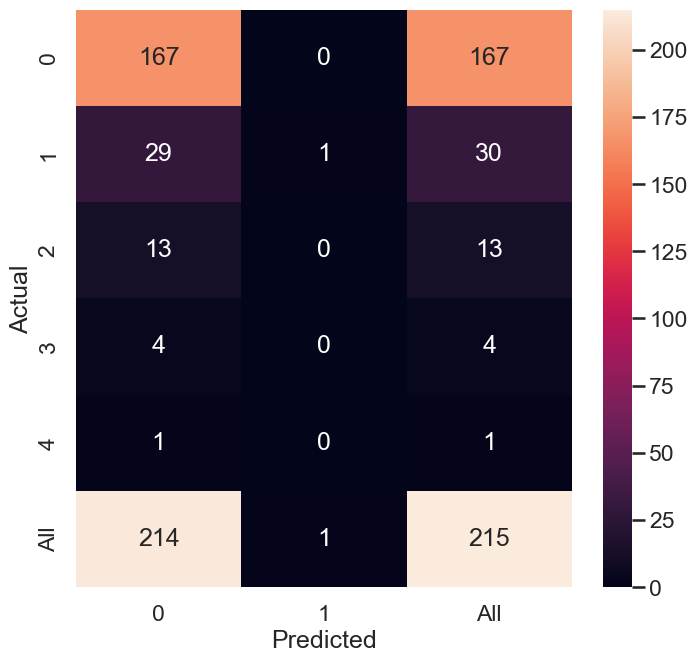

In [54]:
# Highlight the cells with the greatest difference between the actual and predicted values
sns.heatmap(confusion_matrix_df, annot=True, fmt='g')
plt.show()

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       167
           1       1.00      0.03      0.06        30
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1

    accuracy                           0.78       215
   macro avg       0.36      0.21      0.19       215
weighted avg       0.75      0.78      0.69       215

